In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
plt.rc('figure', figsize=(20, 20))
df = pd.read_csv('data/athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [3]:
df=df[['Height','Weight','Medal']] #check medal player with height and weight records
dfmedal=df.dropna()
dfmedal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30196 entries, 40 to 271103
Data columns (total 3 columns):
Height    30196 non-null float64
Weight    30196 non-null float64
Medal     30196 non-null object
dtypes: float64(2), object(1)
memory usage: 943.6+ KB


In [4]:
dfmedal.head()

,Height,Weight,Medal
40,184.0,85.0,Bronze
41,175.0,64.0,Bronze
42,175.0,64.0,Gold
44,175.0,64.0,Gold
48,175.0,64.0,Gold


In [51]:
dfmedal.describe()

,Height,Weight
count,30196.000000,30196.000000
mean,177.639389,73.750364
std,10.923283,15.004619
min,136.000000,28.000000
25%,170.000000,63.000000
50%,178.000000,73.000000
75%,185.000000,83.000000
max,223.000000,182.000000


In [6]:
pd.value_counts(dfmedal['Medal'].values)

Gold      10168
Bronze    10154
Silver     9874
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002688E2B56A0>,
      dtype=object)

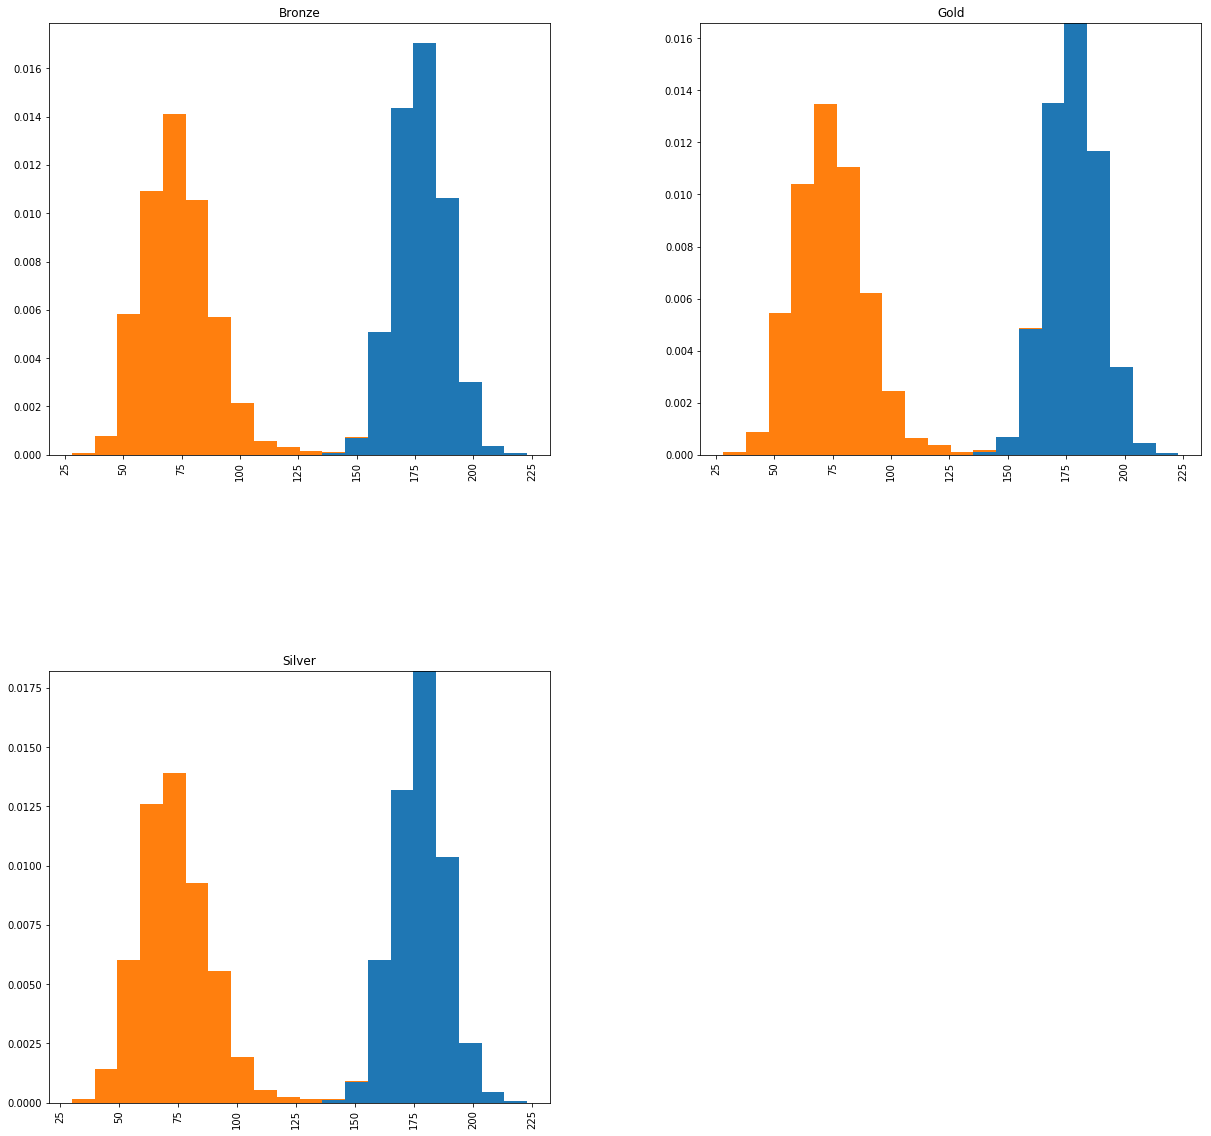

In [76]:
dfmedal.hist(['Height','Weight'],grid=True,bins=20,by='Medal',density=True, histtype='bar', stacked=True,)

# JUST A LITTLE DIFFERENCE BTW 3 MEDALS

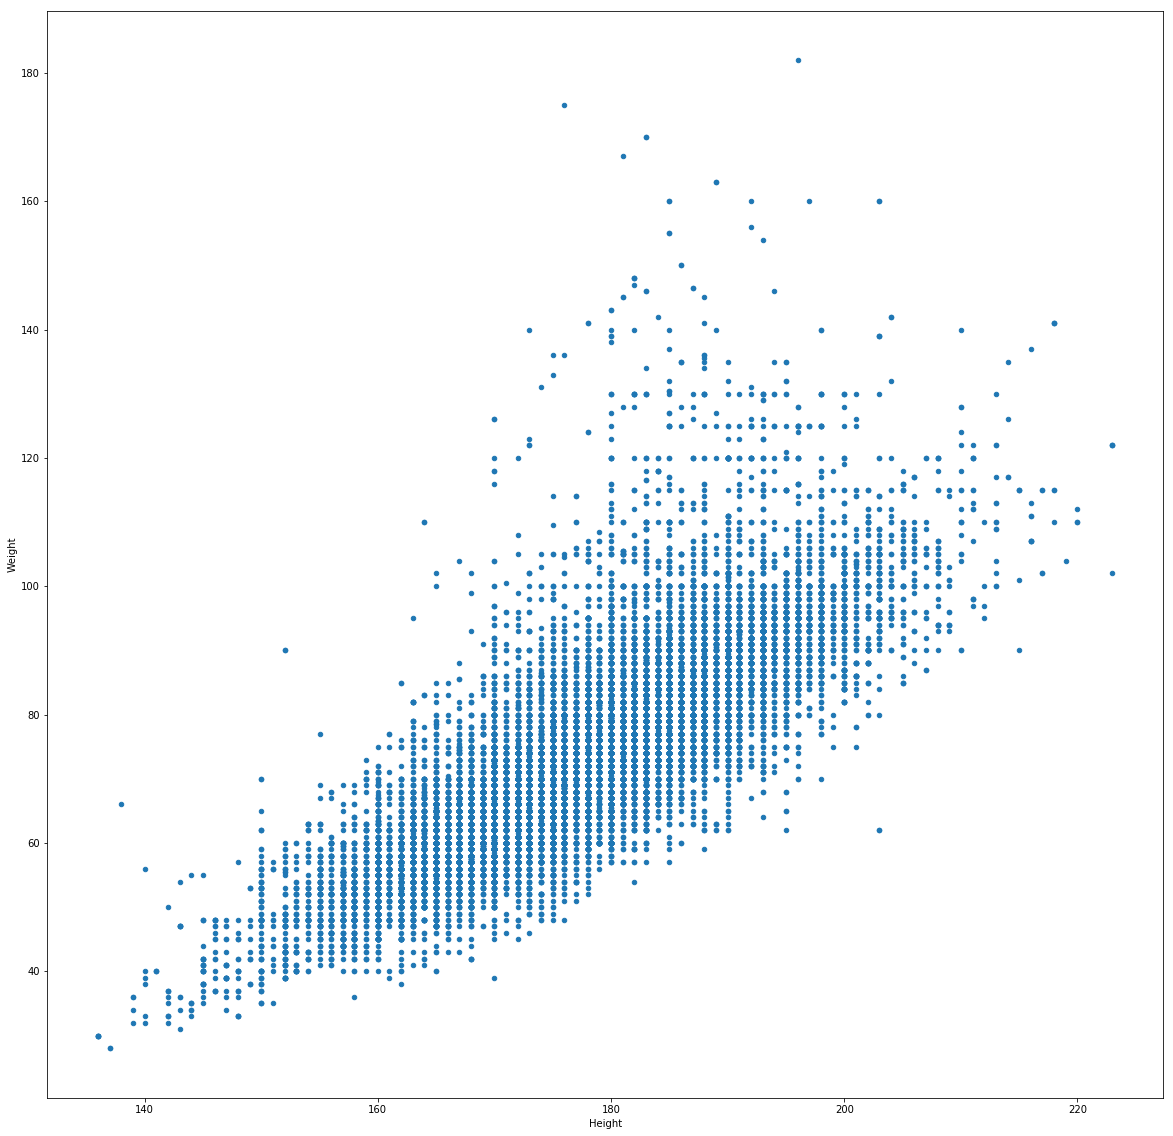

In [70]:
ax2 = dfmedal.plot.scatter(x='Height',y='Weight')

# bmi = weight/height**


In [79]:
dfmedal['BMI']=round(dfmedal['Weight']/(dfmedal['Height']*dfmedal['Height']/10000),2)

In [80]:
dfmedal.head()

,Height,Weight,Medal,BMI
40,184.0,85.0,Bronze,25.11
41,175.0,64.0,Bronze,20.90
42,175.0,64.0,Gold,20.90
44,175.0,64.0,Gold,20.90
48,175.0,64.0,Gold,20.90


In [90]:
dfmedal.describe()

,Height,Weight,BMI
count,30196.000000,30196.000000,30196.000000
mean,177.639389,73.750364,23.164413
std,10.923283,15.004619,2.959391
min,136.000000,28.000000,13.490000
25%,170.000000,63.000000,21.300000
50%,178.000000,73.000000,22.930000
75%,185.000000,83.000000,24.640000
max,223.000000,182.000000,56.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002689051BA58>]],
      dtype=object)

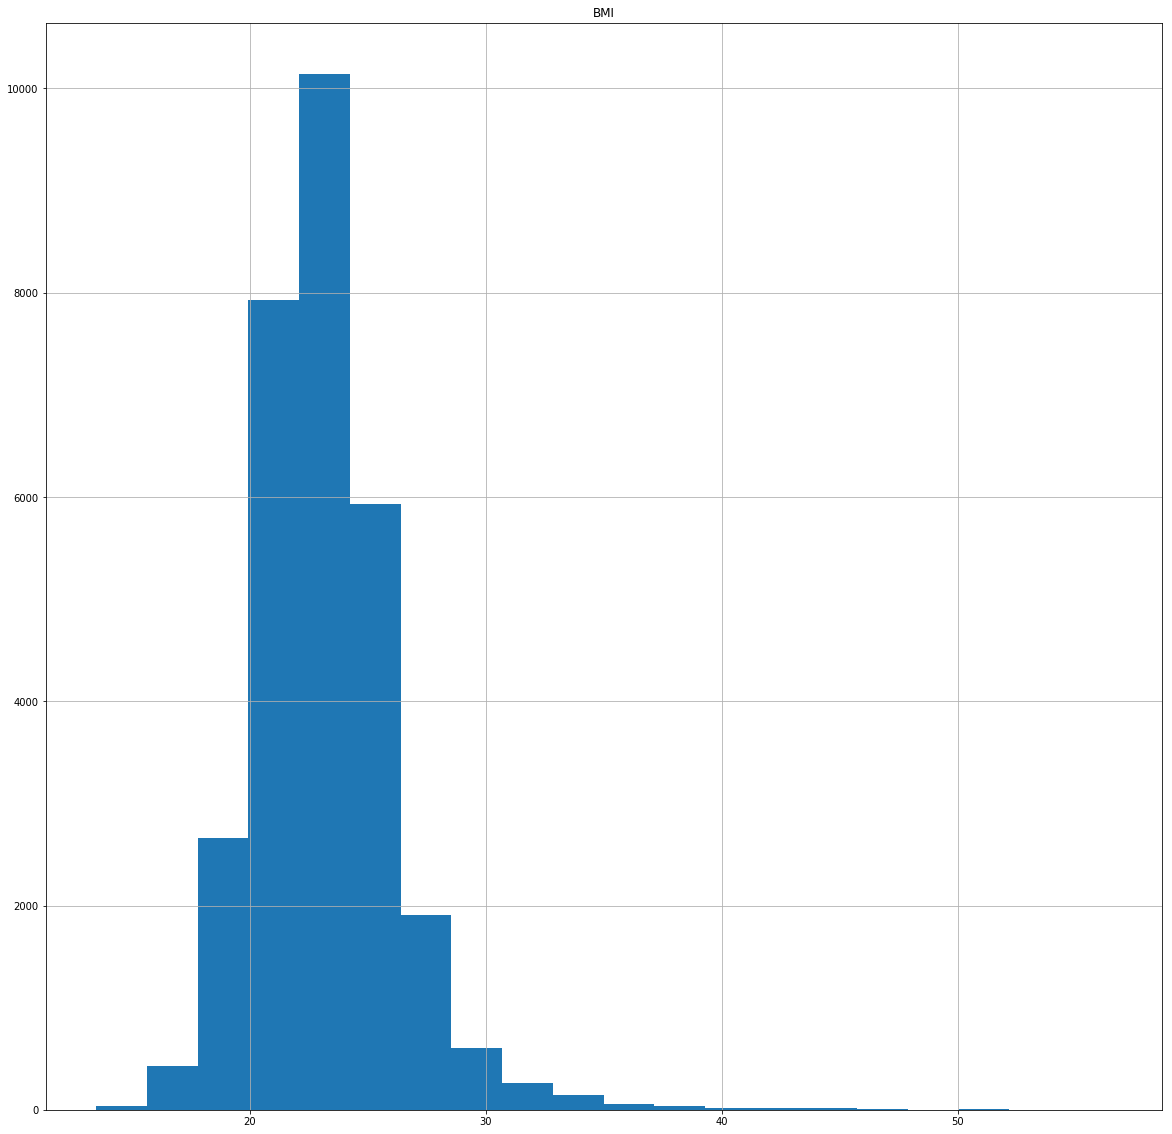

In [89]:
dfmedal.hist('BMI',bins=20)

# 18.5	25

In [99]:
dfbmi=dfmedal.loc[ dfmedal['BMI'] <=25].loc[dfmedal['BMI'] >=18.5]

In [100]:
pd.value_counts(dfbmi['Medal'].values)

Bronze    7823
Gold      7786
Silver    7592
dtype: int64